**<h3>Introduccion<h3>**

Este trabajo consta de un analisis exploratorio y la creacion de un modelo para una tabla de datos sobre Setas. A continuacion se detallaran los pasos que fueron realizandose tanto para analizar los datos.

**<h3>Objetivo<h3>**

El objetivo de este proyecto es la diferenciacion de Setas Comestibles de las Venenosas en todo el dataset, mediante el analisis de sus partes como el tallo, la cebeza, sus colores, fragancias, su habitat, etc.
La problematica seria desarrollar un modelo que pueda tener acceso a diversa cantidad de setas y su clasificacion, aprendiendo asi con nuevas setas a clasificarlas, disminuyendo el trabajo manual y dando oportunidad a un avance cientifico.

**<h3>Contexto Comercial<h3>**

Este proyecto sale de un documental que vi hace unos meses en donde mostraban la gran variedad de setas en el mundo y el estudio que conlleva, desperto mi interes el tener acceso a datos de setas con su clasificacion. Lo primero que vino a mi mente fue "Hay que automatizar la clasificacion de las setas" y generar un aporte a la ciencia. 

**<h3>Conexto analitico<h3>**

De un archivo .xlsx se extraeran datos de una muestra de setas, este consta de variables tipo categorica las cuales se las  debera modificar para poder trabajar con ellas. Tambien se determinaran diferentes conclusiones para analizar que variables son mas importantes para la creacion del modelo.

*Cargo las librerias al proyecto*

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import seaborn.objects as so
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from six import StringIO
from sklearn import metrics
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import warnings

*Cargo mi hoja de datos para poder trabajarla*

In [2]:
df= pd.DataFrame(pd.read_excel("Libro2.xlsx"))
df.head(6)

,ID,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,p,x,s,n,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
1,2,e,x,s,y,t,a,f,c,b,...,s,w,w,p,w,o,p,n,n,g
2,3,e,b,s,w,t,l,f,c,b,...,s,w,w,p,w,o,p,n,n,m
3,4,p,x,y,w,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
4,5,e,x,s,g,f,n,f,w,b,...,s,w,w,p,w,o,e,n,a,g
5,6,e,x,y,y,t,a,f,c,b,...,s,w,w,p,w,o,p,k,n,g


*Visualizo la informacion de los datos*

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        8124 non-null   int64 
 1   class                     8124 non-null   object
 2   cap-shape                 8124 non-null   object
 3   cap-surface               8124 non-null   object
 4   cap-color                 8124 non-null   object
 5   bruises                   8124 non-null   object
 6   odor                      8124 non-null   object
 7   gill-attachment           8124 non-null   object
 8   gill-spacing              8124 non-null   object
 9   gill-size                 8124 non-null   object
 10  gill-color                8124 non-null   object
 11  stalk-shape               8124 non-null   object
 12  stalk-root                8124 non-null   object
 13  stalk-surface-above-ring  8124 non-null   object
 14  stalk-surface-below-ring

Claramente todas las variables son strings, posteriormente trabajare con ellas para una mejor visualizacion

*Traduzco las variables*

In [4]:
df.rename({'class':'Clase',
'cap-shape':'TipoCabeza',
'cap-surface':'SuperficieCabeza',
'cap-color':'ColorCabeza',
'bruises':'Moretones',
'odor':'Fragancia',
'gill-attachment':'AccesorioBranquial',
'gill-spacing':'EspacioBranquias',
'gill-size':'TamannoBranquia',
'gill-color':'ColorBranquia',
'stalk-shape':'FormaTallo',
'stalk-root':'Volva',
'stalk-surface-above-ring':'SuperficieSuperioralAnillo',
'stalk-surface-below-ring':'SuperficieInferioralAnillo',
'stalk-color-above-ring':'ColorTalloSuperioralAnillo',
'stalk-color-below-ring':'ColorTalloInferioralAnillo',
'veil-type':'TipoVelo',
'veil-color':'ColorVelo',
'ring-number':'CantidadAnillos',
'ring-type':'TipoAnillo',
'spore-print-color':'ColorImpresionEsporas',
'population':'Poblacion',
'habitat':'Habitat',
},axis=1,inplace=True)
df.head(5)

,ID,Clase,TipoCabeza,SuperficieCabeza,ColorCabeza,Moretones,Fragancia,AccesorioBranquial,EspacioBranquias,TamannoBranquia,...,SuperficieInferioralAnillo,ColorTalloSuperioralAnillo,ColorTalloInferioralAnillo,TipoVelo,ColorVelo,CantidadAnillos,TipoAnillo,ColorImpresionEsporas,Poblacion,Habitat
0,1,p,x,s,n,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
1,2,e,x,s,y,t,a,f,c,b,...,s,w,w,p,w,o,p,n,n,g
2,3,e,b,s,w,t,l,f,c,b,...,s,w,w,p,w,o,p,n,n,m
3,4,p,x,y,w,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
4,5,e,x,s,g,f,n,f,w,b,...,s,w,w,p,w,o,e,n,a,g


*Reemplazo los valores por cada fila de las variables para un mejor entendimiento*

In [5]:
df.Clase=df.Clase.replace({'p':'venenosa','e':'comestible'})
df.TipoCabeza=df.TipoCabeza.replace({'b':'campana','c':'conica','x':'convexa','f':'plana','k':'protuberante','s':'hundida'})
df.SuperficieCabeza=df.SuperficieCabeza.replace({'f':'fibrosa','g':'ranuras','y':'escamosa','s':'lisa'})
df.ColorCabeza=df.ColorCabeza.replace({'n':'marron','b':'beige','c':'canela','g':'gris','r':'verde','p':'rosa','u':'violeta','e':'rojo','w':'blanco','y':'amarillo'})
df.Moretones=df.Moretones.replace({'t':'si','f':'no'})
df.Fragancia=df.Fragancia.replace({'a':'almendra','l':'anis','c':'creosota','y':'pescado','f':'fetido','m':'mohoso','n':'inoloro','p':'acre','s':'especiado'})
df.AccesorioBranquial=df.AccesorioBranquial.replace({'a':'adjunto','d':'descendente','f':'libre','n':'ranurado'})
df.EspacioBranquias=df.EspacioBranquias.replace({'c':'cerca','w':'abarrotado','d':'distante'})
df.TamannoBranquia=df.TamannoBranquia.replace({'b':'ancho','n':'estrecho'})
df.ColorBranquia=df.ColorBranquia.replace({'k':'negro','n':'marron','b':'beige','h':'chocolate','g':'gris','r':'verde','o':'naranja','p':'rosa','u':'violeta','e':'rojo','w':'blanco','y':'amarillo'})
df.FormaTallo=df.FormaTallo.replace({'e':'agrandando','t':'disminuyendo'})
df.Volva=df.Volva.replace({'b':'bulboso','c':'club','u':'copa','e':'igual','z':'rizomorfos','r':'enraizado','?':'faltante'})
df.SuperficieSuperioralAnillo=df.SuperficieSuperioralAnillo.replace({'f':'fibroso','y':'escamoso','k':'sedoso','s':'liso'})
df.SuperficieInferioralAnillo=df.SuperficieInferioralAnillo.replace({'f':'fibroso','y':'escamoso','k':'sedoso','s':'liso'})
df.ColorTalloSuperioralAnillo=df.ColorTalloSuperioralAnillo.replace({'n':'marron','b':'beige','c':'canela','g':'gris','o':'naranja','p':'rosa','e':'rojo','w':'blanco','y':'amarillo'})
df.ColorTalloInferioralAnillo=df.ColorTalloInferioralAnillo.replace({'n':'marron','b':'beige','c':'canela','g':'gris','o':'naranja','p':'rosa','e':'rojo','w':'blanco','y':'amarillo'})
df.TipoVelo=df.TipoVelo.replace({'p':'parcial','u':'universal'})
df.ColorVelo=df.ColorVelo.replace({'n':'marron','o':'naranja','w':'blanco','y':'amarillo'})
df.CantidadAnillos=df.CantidadAnillos.replace({'n':'ninguno','o':'uno','t':'dos'})
df.TipoAnillo=df.TipoAnillo.replace({'c':'telaranna','e':'evanecente','f':'flaring','l':'grande','n':'ninguno','p':'colgante','s':'revestimiento','z':'local'})
df.ColorImpresionEsporas=df.ColorImpresionEsporas.replace({'k':'negro','n':'marron','b':'beige','h':'chocolate','r':'verde','o':'naranja','u':'violeta','w':'blacno','y':'amarillo'})
df.Poblacion=df.Poblacion.replace({'a':'abundante','c':'agrupada','n':'numerosa','s':'dispersa','v':'diversa','y':'solitaria'})
df.Habitat=df.Habitat.replace({'g':'pastos','l':'hojas','m':'prados','p':'senderos','u':'urbano','d':'bosques','w':'residuos'})
df.head(5)


,ID,Clase,TipoCabeza,SuperficieCabeza,ColorCabeza,Moretones,Fragancia,AccesorioBranquial,EspacioBranquias,TamannoBranquia,...,SuperficieInferioralAnillo,ColorTalloSuperioralAnillo,ColorTalloInferioralAnillo,TipoVelo,ColorVelo,CantidadAnillos,TipoAnillo,ColorImpresionEsporas,Poblacion,Habitat
0,1,venenosa,convexa,lisa,marron,si,acre,libre,cerca,estrecho,...,liso,blanco,blanco,parcial,blanco,uno,colgante,negro,dispersa,urbano
1,2,comestible,convexa,lisa,amarillo,si,almendra,libre,cerca,ancho,...,liso,blanco,blanco,parcial,blanco,uno,colgante,marron,numerosa,pastos
2,3,comestible,campana,lisa,blanco,si,anis,libre,cerca,ancho,...,liso,blanco,blanco,parcial,blanco,uno,colgante,marron,numerosa,prados
3,4,venenosa,convexa,escamosa,blanco,si,acre,libre,cerca,estrecho,...,liso,blanco,blanco,parcial,blanco,uno,colgante,negro,dispersa,urbano
4,5,comestible,convexa,lisa,gris,no,inoloro,libre,abarrotado,ancho,...,liso,blanco,blanco,parcial,blanco,uno,evanecente,marron,abundante,pastos


Como primera instancia a este analisis voy a realizar algunos boxplot para poder ver como estan distribuidos los datos de las variables que opto por analizar y utilizar para mi modelo de clasificacion. Para esto creo otro data set, modifico algunas variables categoricas asignandoles valores naturales.

In [6]:
dg=df
dg.Clase=dg.Clase.replace({'venenosa':'1','comestible':'2'})
leyenda_Clase=["1)Venenosa","2)Comestible"]
dg.TipoCabeza=dg.TipoCabeza.replace({'campana': 1,'conica' : 2,'convexa' : 3,'plana': 4,'protuberante': 5 ,'hundida' :6 })
leyenda_TipoCabeza=["1)Campana","2)Conica","3)Convexa","4)Plana","5)Protuberante","6)Hundida"]
dg.ColorCabeza=dg.ColorCabeza.replace({'marron':1 ,'beige':2,'canela':3,'gris':4,'verde':5,'rosa':6,'violeta':7,'rojo':8,'blanco':9,'amarillo':10})
leyenda_ColorCabeza=['1)marron' ,'2)beige','3)canela','4)gris','5)verde','6)rosa','7)violeta','8)rojo','9)blanco','10)amarillo']
dg.FormaTallo=dg.FormaTallo.replace({'agrandando':'1','disminuyendo':'2'})
leyenda_FormaTallo=['1)Agrandando','2)Disminuyendo']
dg.Moretones=dg.Moretones.replace({'si': 1,'no':2})
leyenda_Moretones=["1)Si posee","2)No posee"]
dg.Habitat=dg.Habitat.replace({'pastos':1,'hojas':2,'prados':3,'senderos':4,'urbano':5,'bosques':6,'residuos':7})
leyenda_Habitat=['1)Pastos','2)Hojas','3)Prados','4)Senderos','5)Urbano','6)Bosques','7)residuos']


In [7]:
print(df["Clase"].value_counts())

2    4208
1    3916
Name: Clase, dtype: int64


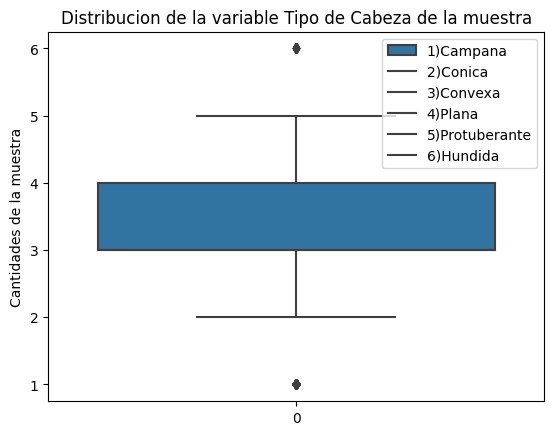

In [8]:
ax=sns.boxplot(dg['TipoCabeza'])
ax.set(xlabel='', ylabel='Cantidades de la muestra',title='Distribucion de la variable Tipo de Cabeza de la muestra')
plt.legend(leyenda_TipoCabeza)

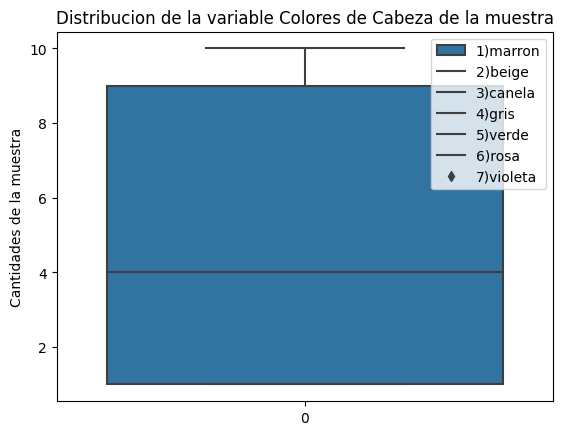

In [9]:
ax=sns.boxplot(dg['ColorCabeza'])
ax.set(xlabel='', ylabel='Cantidades de la muestra',title='Distribucion de la variable Colores de Cabeza de la muestra')
plt.legend(leyenda_ColorCabeza)

Con la variable FormaTallo realizo un grafico Histplot para identificar como estan distribuidos los valores de esta variable, en un boxplot no lo podria identificar dado que me daria una distribucion completa desde el valor 1 al 2.

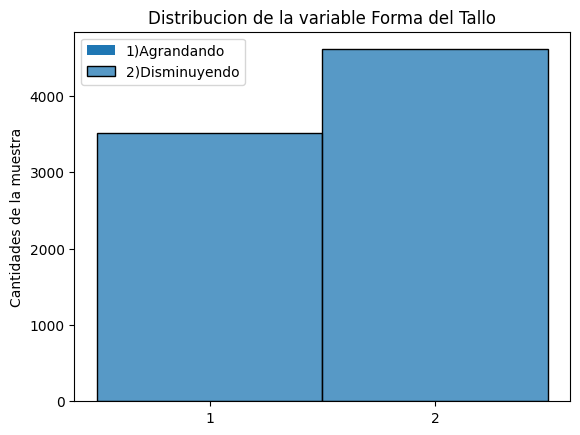

In [10]:
ax=sns.histplot(dg['FormaTallo'])
ax.set(xlabel='', ylabel='Cantidades de la muestra',title='Distribucion de la variable Forma del Tallo')
plt.legend(leyenda_FormaTallo)

Al igual que con la variable Forma Tallo, realizo un Histplot para saber como se encuentran distribuidos los valores de la variable Moretones. 

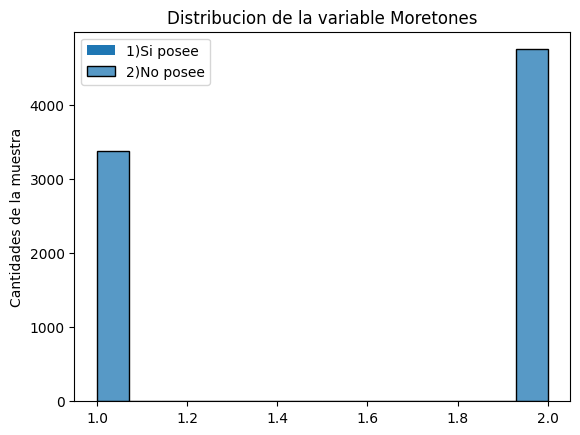

In [11]:
ax=sns.histplot(dg['Moretones'])
ax.set(xlabel='', ylabel='Cantidades de la muestra',title='Distribucion de la variable Moretones')
plt.legend(leyenda_Moretones)

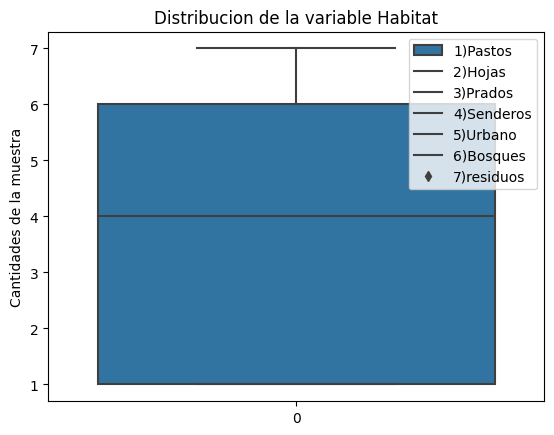

In [12]:
ax=sns.boxplot(dg['Habitat'])
ax.set(xlabel='', ylabel='Cantidades de la muestra',title='Distribucion de la variable Habitat')
plt.legend(leyenda_Habitat)

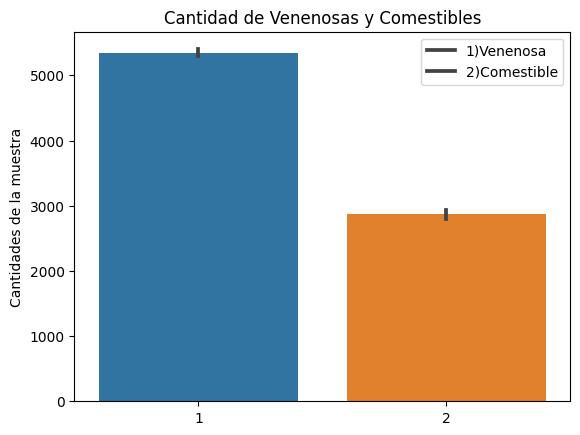

In [13]:
ax=sns.barplot(x=dg['Clase'],y=dg['ID'])
ax.set(xlabel='', ylabel='Cantidades de la muestra',title='Cantidad de Venenosas y Comestibles')
plt.legend(leyenda_Clase)


Exploracion de datos

El color de cabeza en las setas nos daria un indicio para poder clasificarlas en comestibles o venenosas?

A continuacion creo una muestra del data set donde solo se ecuentran las Setas comestibles y las agrupo por su color de cabeza

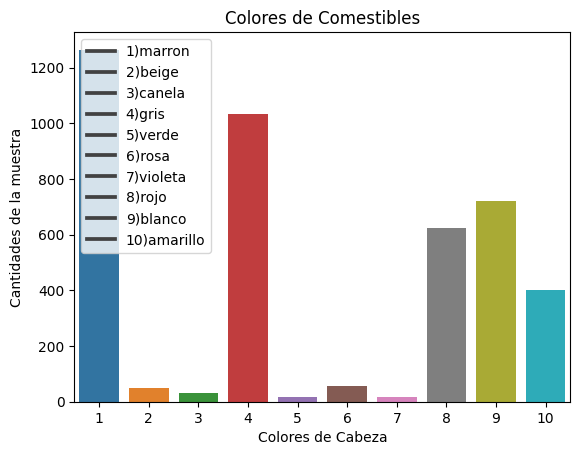

In [14]:
C=df[df['Clase']=='2']
Com=C.groupby('ColorCabeza').count()
Comestible=pd.DataFrame(Com.ID)
Comestible
Comestibleindex=np.array(Comestible.index)
ax= sns.barplot(data=Comestible, x=Comestibleindex,y='ID')
ax.set(xlabel='Colores de Cabeza', ylabel='Cantidades de la muestra',title='Colores de Comestibles')
plt.legend(leyenda_ColorCabeza)


A continuacion creo una muestra del data set donde solo se ecuentran las Setas venenosas y las agrupo por su color de cabeza

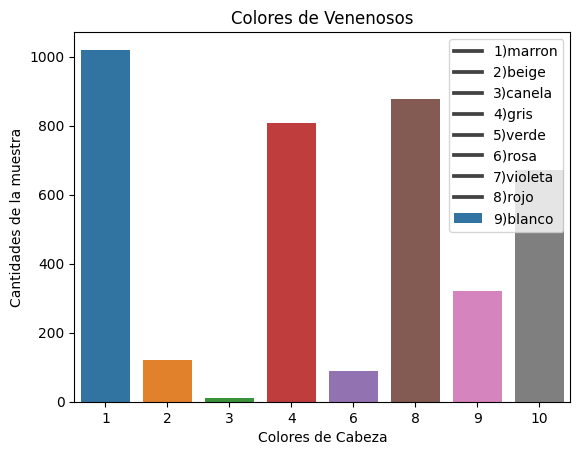

In [15]:
V=df[df['Clase']=='1']
Ven=V.groupby('ColorCabeza').count()
Venenos=pd.DataFrame(Ven.ID)
Venenosindex=np.array(Venenos.index)
ax= sns.barplot(data=Venenos, x=Venenosindex, y='ID')
ax.set(xlabel='Colores de Cabeza', ylabel='Cantidades de la muestra',title='Colores de Venenosos')
plt.legend(leyenda_ColorCabeza)

Se puede apreciar una diferencia en las setas, que es la diversidad de colores en las comestibles ya que tiene dos colores mas que las venenosas el color Violeta y el Verde. Tambien que en algunos colores que clase de seta predomina como el amarillo en las setas venenosas y el blanco en las comestibles. Para una mejor visualizacion utilizo a continuacion un grafico de lineas

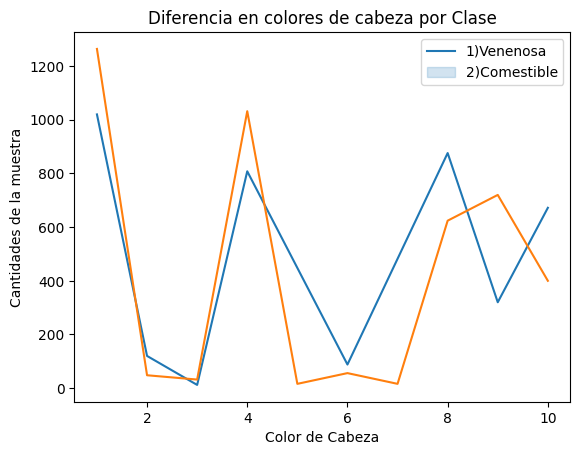

In [16]:
av= sns.lineplot(y=Ven.ID, x=Venenosindex)#Azul
sns.lineplot(y=Com.ID, x=Comestibleindex)#Naranja
av.set(xlabel='Color de Cabeza', ylabel='Cantidades de la muestra',title='Diferencia en colores de cabeza por Clase')
plt.legend(leyenda_Clase)

Con este grafico de lineas se puede ver mejor la diferencia en los colores la recta Naranja representa setas Comestibles y la recta Azul las Venenosas. Se puede apreciar con mas claridad que los colores blanco, marron y gris predominan en las setas comestibles , en cambio el color amarillo en las venenosas. Podemos observar que la muestra no presenta colores verde y violeta para las setas venenosas y muy poca cantidad en los colores beige y canela para ambas clases.
Con esta informacion no se puede concretar que exista una diferencia radical entre las clases solo por su color, dado que las cantidades que diferencian no son muy elevadas.

Creo la Variable total para traerme el total de setas de la muestra, y luego agrupo por clase guardando en variables para un mejor manejo de las mismas posteriormente

In [17]:
Total=df.index
groups= df.groupby(df.Clase)
Venenosas= groups.get_group("1")
Comestibles=groups.get_group("2")

*Cantidades de muestra en su tipo de Poblacion*

Analizo a continuacion que poblacion predomina en la muestra diferenciando por la clase de seta

[Text(0.5, 0, 'Tipo de Poblacion'),
 Text(0, 0.5, 'Cantidades de la muestra'),
 Text(0.5, 1.0, 'Cantidades dependiendo del tipo de Poblacion')]

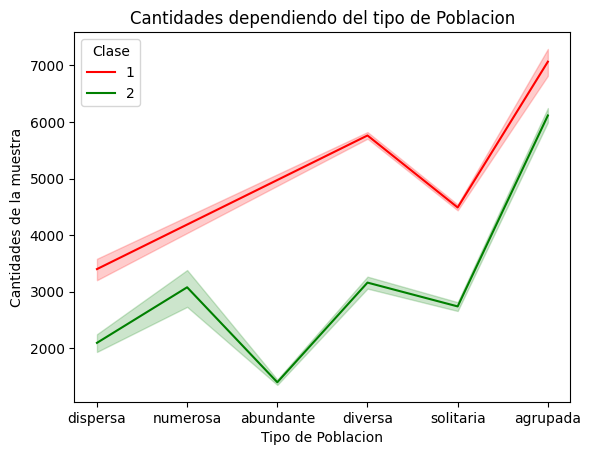

In [18]:
ax= sns.lineplot(data=df, x="Poblacion",y=Total, hue= 'Clase',palette=["red","green"])
ax.set(xlabel='Tipo de Poblacion', ylabel='Cantidades de la muestra',title='Cantidades dependiendo del tipo de Poblacion')

Se puede observar que el habitat de Pastos tiene mayor diversidad de poblaciones de setas. El tipo de poblacion diversa no nos da un dato significativo para este analisis, en cambio agrupada si, ya que nos indica que las setas que viven agrupadas se encuentran en bosques, residuos y hojas(amontonamiento de hojas). 

*Fragancias de la muestra diferenciadas por clase de seta*<br>
Segun la fragancia de la seta, se podria distinguir si una seta es comestible o venenosa?

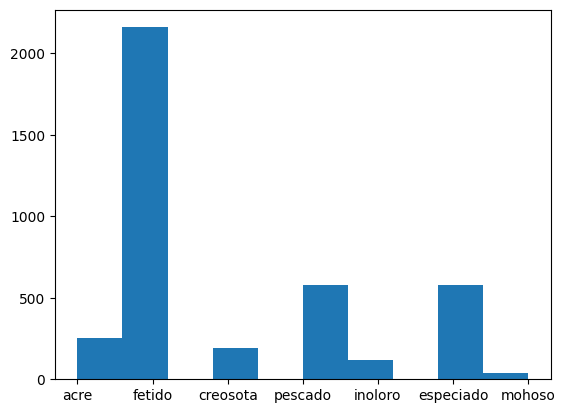

In [19]:
fig,ax=plt.subplots()
ax.hist( x=Venenosas['Fragancia'])
plt.show()

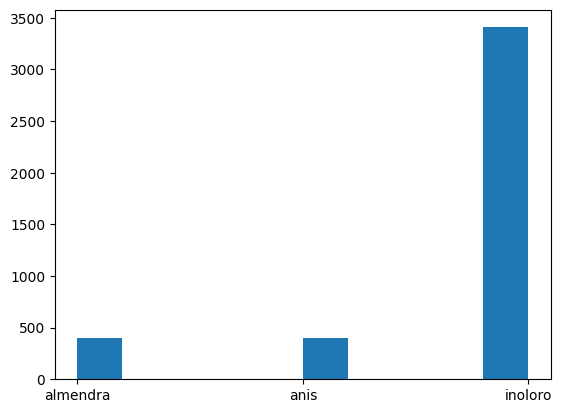

In [20]:
fig,ax=plt.subplots()
ax.hist( x=Comestibles['Fragancia'])
plt.show()

En las setas venenosas predomina la fragancia Fetido, tambien tenemos cieta cantidad con fragancia Pescado y Especiado. En cambio, para las setas comestibles la fragancia que predomina es Inoloro. Con esto tenemos una gran conclusion sobre la muestra, dado que las fragancias son totalmente distintas para las clases de setas y que podemos observar que fragancia predomina.
Las setas de la muestra con fragancias fetidas son comunmente Venenosas. 

-Entregable 3-

Este DataSet lo elegi con la intencion de desarrollar un algoritmo que al darle ciertos datos como color de cabeza, tipo de tallo, habitat en donde se lo encontro, etc, me clasifique la seta que le estoy cargando en Comestible o Venenosa.
Como primera hipotesis para clasificarlas observe que en la muestra me encuentro con setas que tienen moretones, realizare un grafico de barras para identificar que parte de la muestra contiene moretones y de ese grupo cuales son venenosas.




*Diferenciacion de setas por la forma de su Tallo*<br>

La forma del tallo tambien me da indicios de que hay una diferencia entre comestibles y venenosas, por lo tanto realizo una grafico de barras para ver que tipo de tallo predomina dependiendo la clase.

A continuacion se grafica los tipos de Forma del Tallo de las setas de la muestra, y se las discrimina por su clase para saber que tipo de tallo predomina en cada clase.

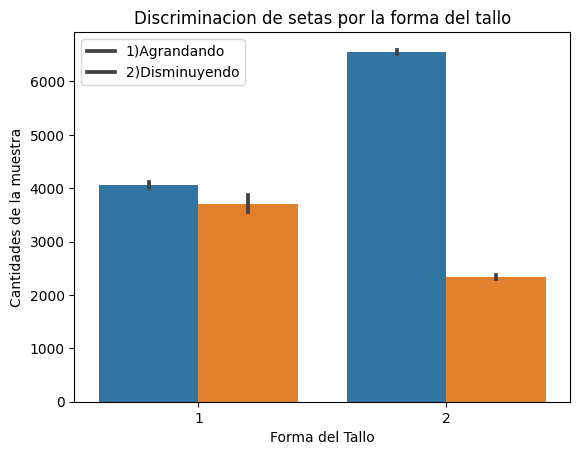

In [21]:
ax=sns.barplot(x=df['FormaTallo'], y=Total,hue=df['Clase'])
ax.set(xlabel='Forma del Tallo', ylabel='Cantidades de la muestra',title='Discriminacion de setas por la forma del tallo')
plt.legend(leyenda_FormaTallo)

En este grafico de barras se observa claramente la difencia en cuanto a la forma del tallo de la seta, en la clase Comestibles la diferencia radica en que hay mas cantidad en la muestra de hongos comestibles que su tallo se va agrandando conforme llega a la cabeza de la seta. En cambio, en la clase Venenosos es mucho mas relevante el tipo de tallo que disminuye su tamanno conforme llega a la cabeza.

*Setas que poseen moretones divididas por su clase*<br>

Como primera hipotesis para clasificarlas observe que en la muestra me encuentro con setas que tienen moretones

A continuacion realizo un grafico de barras para identificar que clase tiende a tener moretones y si es posible realizar alguna comparacion para determinar que si la seta posee moretones se la puede clasificar como Comestible o Venenosa. Dando asi una rapida identificacion de la seta para su clasficacion.

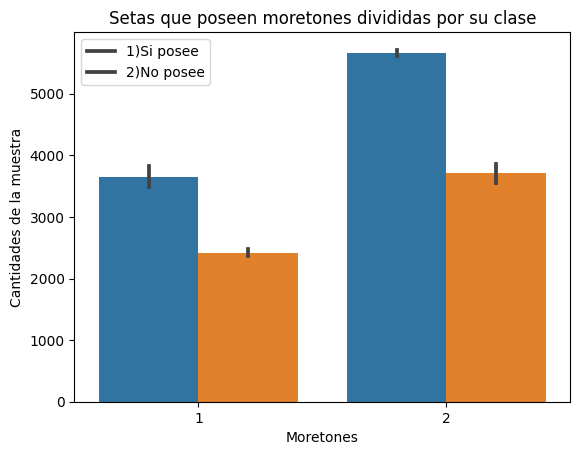

In [22]:
ax=sns.barplot(x=df['Moretones'],y=Total,hue=df['Clase'])
ax.set(xlabel='Moretones', ylabel='Cantidades de la muestra',title='Setas que poseen moretones divididas por su clase')
plt.legend(leyenda_Moretones)

Este grafico de barras nos muestra la diferencia entre setas que tienen moretones y las que no, entre ellas difiere entre Comestibles y Venenosas. La diferencia no tiene mucha importancia ya que en ambos casos se observa que hay mas cantidad de setas que no tienen moretones ya sean venosas o comestibles. Por lo tanto aqui obtengo una conclusion a una hipotesis... Los moretones en las setas no dan posibilidad de una rapida clasificacion, si no que prestan a su confusion por lo que tengo que seguir buscando el punto de quiebre que distinga las setas.

Correlacion entre Tipo y Color de Cabeza, distinguiendo entre clases:

Realizo un grafico de distribucion entre las dos variables Tipo y Color de cabeza sobre la muestra completa distinguiendo entre clases para asi identificar una posible correlacion entre las variables.

[Text(0.5, 0, 'Color de Cabeza'),
 Text(0, 0.5, 'Tipo de Cabeza'),
 Text(0.5, 1.0, 'Correlacion entre Tipo y Color de Cabeza, distinguiendo entre clases')]

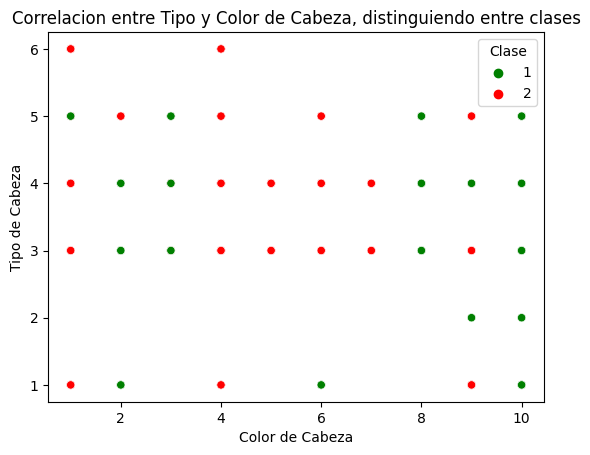

In [23]:
ax=sns.scatterplot(x='ColorCabeza',y='TipoCabeza',hue ='Clase',data=dg,palette={"red","green"})
ax.set(xlabel='Color de Cabeza', ylabel='Tipo de Cabeza',title='Correlacion entre Tipo y Color de Cabeza, distinguiendo entre clases')

Con este grafico de distribucion puedo observar a simple vista la predominancia del color amarillo(10) en la cabeza de las setas Venenosas, asi como tambien el color Gris(4) en la cabeza de las comestibles. En cuanto al tipo de cabeza hay una diferencia en que tipo Conica(2) predomina en setas Venenosas, en cambia el tipo Convexa(3) y Hundida(6) hace diferencia en las Comestibles.

A continuacion aprovecho la asignacion de valores naturales para las variables Moretones y Habitat. Lo cual me ayudara para identificar la distribucion de estas variables entre si, mostrandome la distribucion de las setas de la muestra en cada habitat y distinguiendo en si poseen o no moretones, por ultimo una discriminacion entre clases para poder observar con claridad cual predomina.

<AxesSubplot: xlabel='Moretones', ylabel='Habitat'>

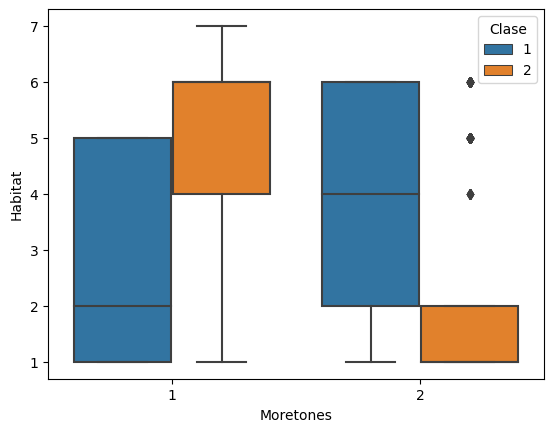

In [24]:
sns.boxplot(x='Moretones', y='Habitat',data=dg,hue='Clase')


Con este boxplot puedo apreciar con claridad la diferencia entre setas con moretones y sin moretones, con la presencia de la discriminacion entre habitats y siendo clasificadas en comestibles o venenosas. De aqui una pequenna hipotesis, setas venenosas con moretones radican mayormente en Hojas (capa de follage que se forma en el suelo no permitiendo el ingreso de luz solar en cantidad), sin embargo encuentro una gran distribucion de setas venenosas sin moretones a lo largo de habitats como Urbano,Senderos y Prados. Tambien puede observarse algunas setas comestibles sin moretones en Urbano, Senderos y Bosques lo que complicaria la clasificacion contra las setas venenosas sin moretones que presentan una mayor distribucion en estos mismos habitats.

*Creacion de Modelo Predictivo*

A continuacion se realiza el algoritmo de decision Arbol de Decision, el cual se basa en una representacion grafica de posibles soluciones basada en ciertas condiciones. En este caso las condiciones por las cuales va a predecir la 'Clase' de seta (Venenosa o Comestibl) es mediante las variables: 
<ul>
-TipoCabeza
-ColorCabeza
-Moretones
-FormatTallo
-Habitat
<ul>

Primero creo mi set de trabajo a partir de mi set de datos general y elimino variables que no voy a utilizar

In [25]:
drop_elements=['ID','SuperficieCabeza','AccesorioBranquial','EspacioBranquias','TamannoBranquia','SuperficieSuperioralAnillo','SuperficieInferioralAnillo','ColorTalloSuperioralAnillo','ColorTalloInferioralAnillo','TipoVelo','ColorVelo','CantidadAnillos','TipoAnillo','ColorImpresionEsporas','ColorBranquia','Fragancia','Volva','Poblacion']
dfinal = df.drop(drop_elements, axis = 1)
dfinal

,Clase,TipoCabeza,ColorCabeza,Moretones,FormaTallo,Habitat
0,1,3,1,1,1,5
1,2,3,10,1,1,1
2,2,1,9,1,1,3
3,1,3,9,1,1,5
4,2,3,4,2,2,1
...,...,...,...,...,...,...
8119,2,5,1,2,1,2
8120,2,3,1,2,1,2
8121,2,4,1,2,1,2
8122,1,5,1,2,2,2


Defino mi x e y para trabajar mi modelo

In [26]:
x=dfinal.drop(['Clase'],axis=1)
y=df['Clase']

Con mis variables X e Y puedo crear mis datos de entrenamiento y mis datos de prueba

In [27]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.3, random_state=3)


Verifico mediante KFold el numero de ramificaciones que deberia tener mi arbol

In [28]:
cv = KFold(n_splits=10) # Numero deseado de "folds" que realizare
accuracies = list()
max_attributes = len(list(dfinal))
depth_range = range(1, max_attributes + 1)
 
# Testeo la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={'1':1,'2':2})
    for train_fold, valid_fold in cv.split(dfinal):
        f_train = dfinal.loc[train_fold] 
        f_valid = dfinal.loc[valid_fold] 
 
        model = tree_model.fit(X = f_train.drop(['Clase'], axis=1), 
                               y = f_train["Clase"]) 
        valid_acc = model.score(X = f_valid.drop(['Clase'], axis=1), 
                                y = f_valid["Clase"]) #Calculo la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)
 
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.529357
         2          0.725121
         3          0.742175
         4          0.819896
         5          0.913699
         6          0.894883


El accuracy mas alto (0.91..) lo obtuve con 5 ramificaciones, por lo que ahora creo el arbol de decision utilizando el criterio de 'entropy' por ser variables categoricas.

In [29]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=5)

Una vez creado lo entreno con mis datos de entrenamiento

In [30]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

Ahora pongo a prueba el modelo, con mis datos de testeo ejecuto el arbol de decision y calculo el accuracy.

In [31]:
predTree = drugTree.predict(X_testset)
print (predTree [0:11])
print (y_testset [0:11])
print("Precisión de los Arboles de Decisión: ", metrics.accuracy_score(y_testset, predTree))

['2' '2' '2' '2' '2' '1' '1' '1' '2' '2' '2']
3689    2
3768    2
2084    2
5804    2
1866    2
5842    1
6348    1
7060    1
7459    2
2951    2
2872    2
Name: Clase, dtype: object
Precisión de los Arboles de Decisión:  0.938884331419196


C:\Users\Lauti\AppData\Local\Temp\ipykernel_13776\2638959499.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print (y_testset [0:11])


Me da un accuracy bastante alto-0.93-por lo que el modelo esta bien entrenado y funcionando, a continuacion calculo algunas metricas vistas en clase y extraigo conclusiones

Calculo la matriz de confusion, muestro el accuracy, calculo el recall y la precision. Por ultimo calculo las metricas pedidas.

In [32]:
# Matriz de confusion
from sklearn.metrics import confusion_matrix
print('Matriz de confusion',confusion_matrix(y_testset, predTree))
# Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy',accuracy_score(y_testset, predTree))
# Recall
from sklearn.metrics import recall_score
print('Recall',recall_score(y_testset, predTree, average=None))
# Precision
from sklearn.metrics import precision_score
print('Precision',precision_score(y_testset, predTree, average=None))

Matriz de confusion [[1088   71]
 [  78 1201]]
Accuracy 0.938884331419196
Recall [0.93874029 0.93901486]
Precision [0.93310463 0.94418239]


La matriz de confusion me da los valores correctos en cuanto a Verdadero positivo y Verdadero negativo, Observo que el accuracy me da 0.93 por lo que el error es bastante bajo al aplicar el algoritmo, esto lo corroboro con la matriz de confusion que me da los valores correctos en cuanto a Verdadero positivo y Verdadero negativo, que falsos negativos y falsos positivos son relativamente bajos en comparacion con los Verdaderos Positivos y Verdaderos Negativos. En cuanto a la presicion (capacidad del clasificador de no etiquetar una muestra negativa como positiva) me da como resultado 0.933 y 0.944 ya que la relacion entre Verdadero positivo y Falso positivo es (tp/(tp+fp))->(1088/(1088+71))->0.933 y la relacion Verdadero Negativo y Falso Negativo es  (tn/(tn+fn))->(1201/(1201+78))->0.944 .Con Recall (capacidad del clasificador para encontrar todas las muestras positivas) sucede algo similar, ya que la relacion entre Verdadero positivo y Falso negativo (tp / (tp + fn))->(1088/(1088+78))->0.938 y la relacion de Verdadero negativo y Falso positivo es (tn / (tn + fp))->(1201/(1201+71))->0.939

Para hacer mas intuitivo este algoritmo decidi dar un menu de eleccion para la clasificacion de las setas, por ende se ingresan a traves de teclado las diferentes variantes de cada variable guardandolas en una lista.
Luego se aplica esta lista creada al modelo para generar su prediccion.

In [33]:
variables=('TipoCabeza','ColorCabeza','Moretones','FormaTallo','Habitat')
lista_predict=[]
diccio={'TipoCabeza':('1)Campana-2)Conica-3)Convexa-4)Plana-5)protuberante-6)hundida'),
        'ColorCabeza':('1)marron 2)beige 3)canela 4)gris 5)verde 6)rosa 7)violeta 8)rojo 9)blanco 10)amarillo'),
        'Moretones':("1)Si posee 2)No posee"),
        'FormaTallo':('1)Agrandando 2)Disminuyendo'),
        'Habitat':('1)Pastos 2)Hojas 3)Prados 4)Senderos 5)Urbano 6)Bosques 7)residuos')}
i=0
for a in variables:
    print("Ingrese",variables[i],diccio[a])
    b=input()
    lista_predict.append(b)
    i+=1
lista_predict



Ingrese TipoCabeza 1)Campana-2)Conica-3)Convexa-4)Plana-5)protuberante-6)hundida
Ingrese ColorCabeza 1)marron 2)beige 3)canela 4)gris 5)verde 6)rosa 7)violeta 8)rojo 9)blanco 10)amarillo
Ingrese Moretones 1)Si posee 2)No posee
Ingrese FormaTallo 1)Agrandando 2)Disminuyendo
Ingrese Habitat 1)Pastos 2)Hojas 3)Prados 4)Senderos 5)Urbano 6)Bosques 7)residuos


['3', '5', '2', '2', '7']

In [35]:
x_test = pd.DataFrame(columns=('TipoCabeza','ColorCabeza','Moretones','FormaTallo','Habitat'))
x_test.loc[0] = lista_predict
y_pred = drugTree.predict(x_test)
if (y_pred=='1'):
    print("Prediccion: Seta Venenosa")
else: 
    print("Prediccion: Seta Comestible")

Prediccion: Seta Venenosa
